# PCA 2 (Core) / Elida Peña

**Visualización de Datos con Componentes Principales**

**Descripción:**

En esta actividad, utilizarás el Análisis de Componentes Principales (PCA) para visualizar datos en un espacio de menor dimensionalidad. Trabajarás con el famoso dataset «Iris» para reducir sus características a dos componentes principales y visualizar cómo se distribuyen las diferentes clases en este nuevo espacio de características.

Enlace al dataset: https://www.kaggle.com/uciml/iris



**Objetivo:**

El objetivo es reducir la dimensionalidad del dataset «Iris» mediante PCA, visualizando las clases en el nuevo espacio bidimensional y evaluando si los componentes principales son capaces de capturar adecuadamente la variabilidad de los datos.



**Instrucciones:**

1. Carga de datos:
  – Descarga el dataset «Iris» de Kaggle. Examina las características disponibles, que incluyen el largo y ancho de los sépalos y pétalos de tres especies de flores.
  – Asegúrate de que los datos no contengan valores nulos o atípicos.

2. Exploración y preprocesamiento de datos:
  – Realiza una normalización de los datos, ya que PCA requiere que las características tengan la misma escala para funcionar de manera efectiva.
  – Observa la distribución inicial de las variables mediante gráficos de dispersión o histogramas.

3. Aplicación de PCA:
  – Implementa PCA para reducir las cuatro dimensiones del dataset «Iris» a solo dos componentes principales.
  – Calcula la «explained variance» para estos dos componentes y discute qué porcentaje de la variabilidad total de los datos está capturada en el espacio bidimensional.

4. Visualización de los componentes principales:
  – Proyecta los datos en el espacio bidimensional formado por los dos primeros componentes principales.
  – Utiliza diferentes colores para representar cada una de las tres clases de flores en el gráfico y observa cómo se agrupan las clases en el espacio de los componentes principales.

5. Interpretación de los resultados:
  – Analiza los coeficientes de los dos componentes principales y explica qué variables tienen la mayor influencia en estos.
  – Discute si PCA es capaz de separar correctamente las clases y cómo este análisis puede mejorar la comprensión de los datos.

**Análisis de Resultados:**

  – Compara la distribución de las clases en el espacio bidimensional con la distribución original de las variables. ¿Qué tan bien puede PCA capturar las relaciones entre las clases en este caso?
  – Realiza un reporte que incluya el gráfico de los componentes principales y discute la utilidad de PCA para la visualización de datos en problemas de clasificación.

**Conclusión:**

  – Esta actividad se centra en la visualización de datos utilizando PCA. La reducción de dimensionalidad mediante PCA no solo ayuda a visualizar los datos en un espacio más pequeño, sino que también permite identificar las relaciones entre las variables y las clases.

In [2]:
# Paso 1: Importación de librerías necesarias y carga del dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Cargar el dataset Iris desde sklearn para simplificar
from sklearn.datasets import load_iris

# Cargar los datos y convertirlos en un DataFrame
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset Iris:")
print(df.head())

# Revisar valores nulos
print("\n¿Existen valores nulos?")
print(df.isnull().sum())

Primeras filas del dataset Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

¿Existen valores nulos?
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


<Figure size 1000x600 with 0 Axes>

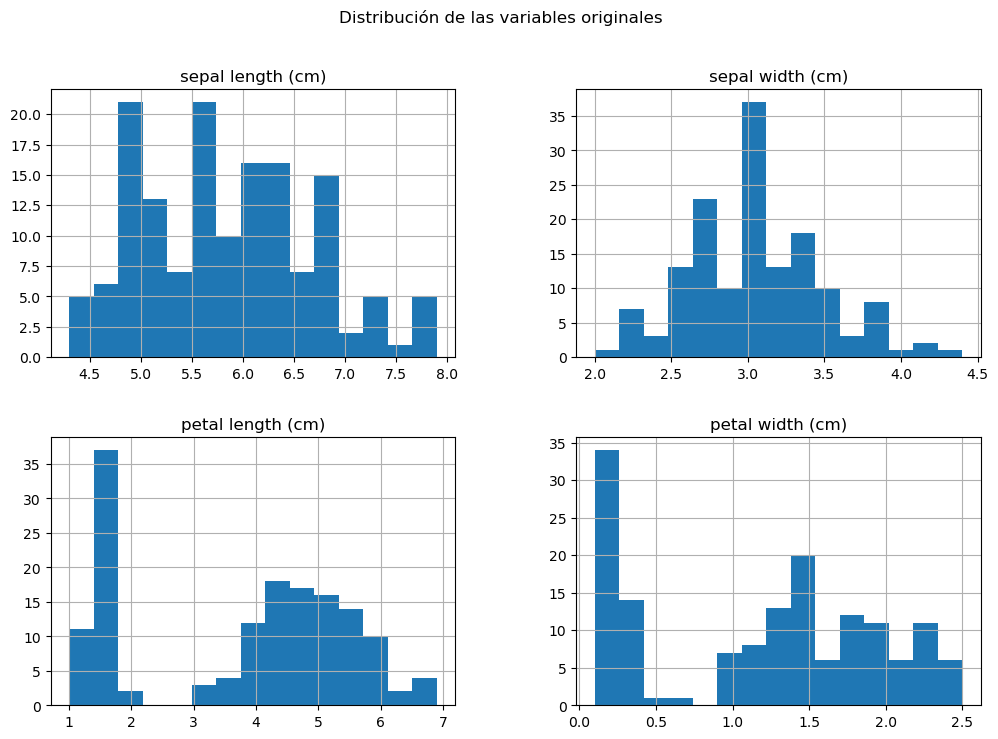

In [4]:
# Paso 2: Normalización de las características
from sklearn.preprocessing import StandardScaler

# Separar características y etiquetas
X = df.drop(columns=['species'])
y = df['species']

# Normalizar las características
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Visualizar la distribución inicial con histogramas
plt.figure(figsize=(10, 6))
df.drop(columns=['species']).hist(bins=15, figsize=(12, 8), layout=(2, 2))
plt.suptitle('Distribución de las variables originales')
plt.show()


In [5]:
# Paso 3: Aplicación de PCA
from sklearn.decomposition import PCA
import numpy as np

# Inicializar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# Varianza explicada por los dos primeros componentes
explained_variance = pca.explained_variance_ratio_
print("\nVarianza explicada por los dos primeros componentes principales:")
print(f"Componente 1: {explained_variance[0]:.4f}")
print(f"Componente 2: {explained_variance[1]:.4f}")
print(f"Varianza total capturada: {np.sum(explained_variance):.4f}")



Varianza explicada por los dos primeros componentes principales:
Componente 1: 0.7296
Componente 2: 0.2285
Varianza total capturada: 0.9581


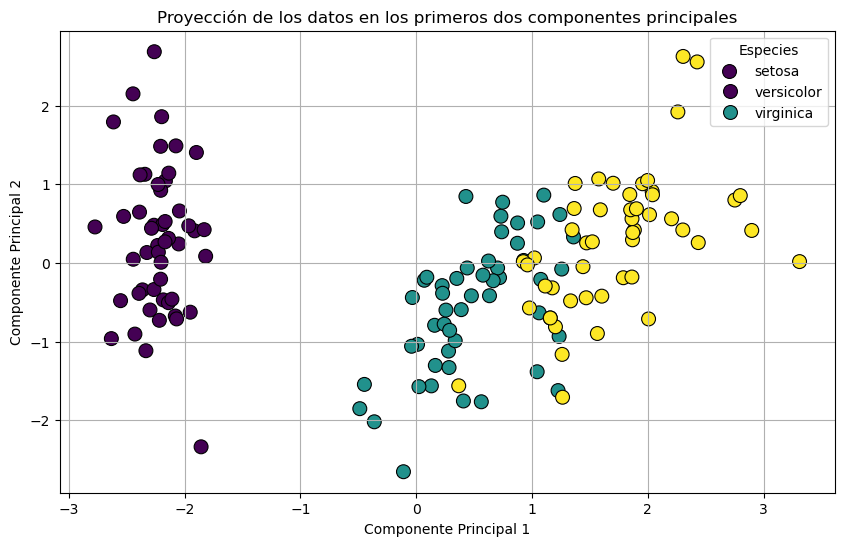

In [6]:
# Paso 4: Visualización de los componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', edgecolor='k', s=100
)
plt.title('Proyección de los datos en los primeros dos componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Especies', labels=iris.target_names)
plt.grid()
plt.show()


In [7]:
# Paso 5: Contribución de las variables a los componentes principales
componentes = pd.DataFrame(
    pca.components_,
    columns=iris.feature_names,
    index=['Componente 1', 'Componente 2']
)

print("\nContribución de las variables originales a los componentes principales:")
print(componentes)

# Analizar las variables más influyentes en el primer componente
print("\nVariables más influyentes en el Componente 1:")
print(componentes.loc['Componente 1'].sort_values(ascending=False))



Contribución de las variables originales a los componentes principales:
              sepal length (cm)  sepal width (cm)  petal length (cm)  \
Componente 1           0.521066         -0.269347           0.580413   
Componente 2           0.377418          0.923296           0.024492   

              petal width (cm)  
Componente 1          0.564857  
Componente 2          0.066942  

Variables más influyentes en el Componente 1:
petal length (cm)    0.580413
petal width (cm)     0.564857
sepal length (cm)    0.521066
sepal width (cm)    -0.269347
Name: Componente 1, dtype: float64
